In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data=pd.read_csv("/content/electricitybilldataset.csv")
print(data)

          date  ac  tv       units
0   01-01-2016   1   1  134.731117
1   01-02-2016   0   1  125.315527
2   01-03-2016   1   1  123.047874
3   01-04-2016   1   1   80.046162
4   01-05-2016   0   1  128.429094
..         ...  ..  ..         ...
93  01-10-2023   0   1  141.437828
94  01-11-2023   1   1  168.812108
95  01-12-2023   0   1  128.512443
96  01-01-2024   1   1  152.066099
97  01-02-2024   0   0   72.714233

[98 rows x 4 columns]


In [ ]:
# Reading the CSV file into a DataFrame
data = pd.read_csv("/content/electricitybilldataset.csv")
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y')

start_date = '2016-01-01'
end_date = '2024-02-01'

# Filtering the DataFrame based on the date range
filtered_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]

# Calculating the mean of the "units" column within the specified date range
mean_units = filtered_data['units'].mean()
print("Mean units from", start_date, "to", end_date, ":", mean_units)

# Grouping the data by date and calculate the mean units for each date
df = filtered_data.groupby('date')['units'].mean().reset_index()
print(df)

# Calculating and display the mean of all units
all_units_mean = data['units'].mean()
print("Mean of all units:", all_units_mean)

Mean units from 2016-01-01 to 2024-02-01 : 125.12219359653062
         date       units
0  2016-01-01  134.731117
1  2016-02-01  125.315527
2  2016-03-01  123.047874
3  2016-04-01   80.046162
4  2016-05-01  128.429094
..        ...         ...
93 2023-10-01  141.437828
94 2023-11-01  168.812108
95 2023-12-01  128.512443
96 2024-01-01  152.066099
97 2024-02-01   72.714233

[98 rows x 2 columns]
Mean of all units: 125.12219359653062


In [ ]:
# Calculate the 30-days average
rolling_avg = df.rolling(window=30).mean()
print(rolling_avg)

         units
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
..         ...
93  121.629375
94  122.901447
95  121.810040
96  124.414306
97  123.307940

[98 rows x 1 columns]


<ipython-input-7-847aa5ae699b>:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date'], dtype='object')
  rolling_avg = df.rolling(window=30).mean()


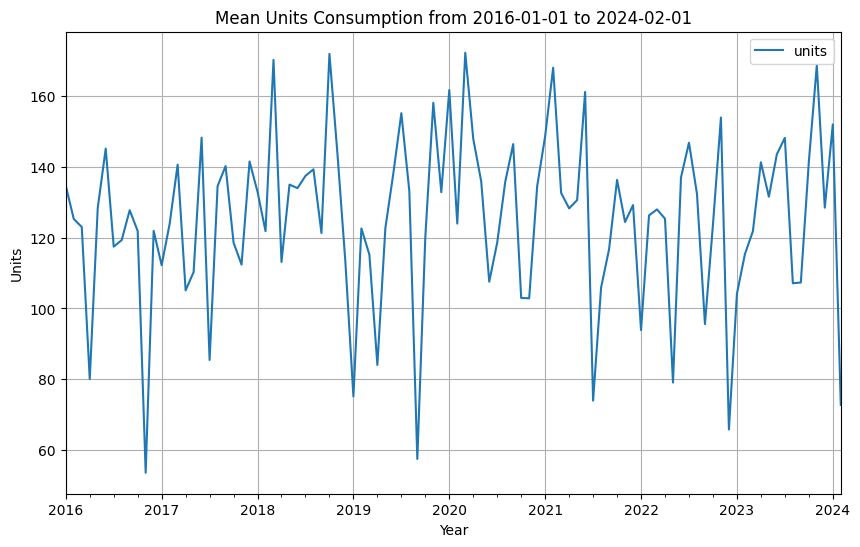

In [10]:
# prompt: plot a graph
import matplotlib.pyplot as plt
df.plot(x='date', y='units', figsize=(10, 6))
plt.xlabel("Year")
plt.ylabel("Units")
plt.title("Mean Units Consumption from {} to {}".format(start_date, end_date))
plt.grid(True)
plt.show()
